In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score

In [2]:
train = pd.read_csv('Flight_train.csv')
test = pd.read_csv('Flight_test.csv')

In [3]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
train.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
test.drop('Unnamed: 0', axis = 1, inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [9]:
test.shape

(25976, 24)

In [10]:
train.shape

(103904, 24)

In [11]:
train.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [12]:
train.dropna(inplace = True)

In [13]:
train.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [14]:
test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [15]:
test.dropna(inplace = True)

In [16]:
train.shape

(103594, 24)

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64

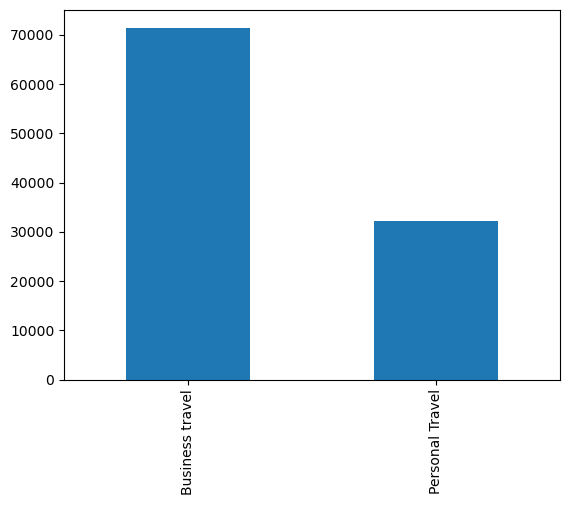

In [17]:
train['Type of Travel'].value_counts().plot(kind='bar')
train['Type of Travel'].value_counts()

In [18]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [19]:
test.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

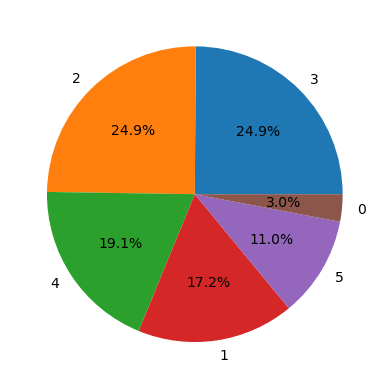

In [20]:
wifi_service = train['Inflight wifi service'].value_counts()
plt.pie(wifi_service, labels=wifi_service.index, autopct= '%.1f%%' )
plt.show()

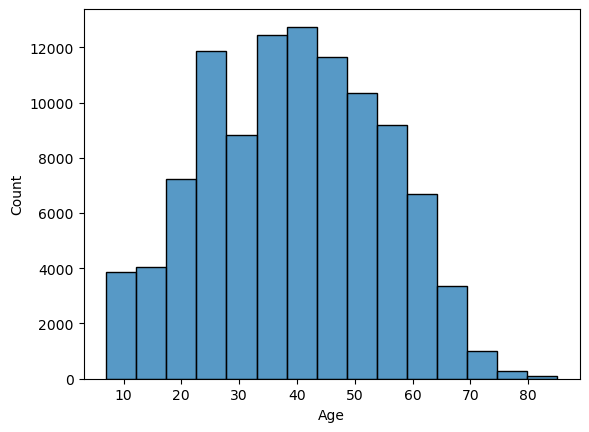

In [21]:
sns.histplot(train.Age, bins=15)
plt.show()

In [22]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64

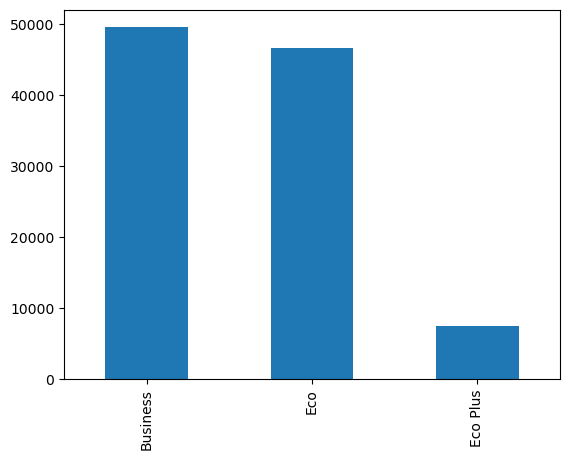

In [23]:
train['Class'].value_counts().plot(kind='bar')
train['Class'].value_counts()

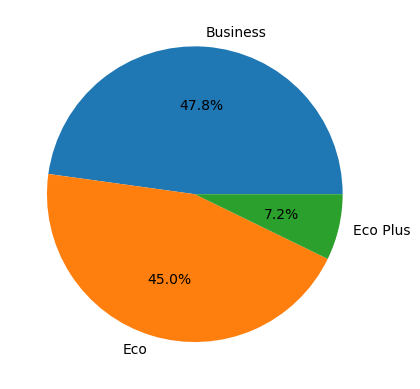

In [24]:
class_type = train['Class'].value_counts()
plt.pie(class_type, labels=class_type.index, autopct='%0.1f%%')
plt.show()

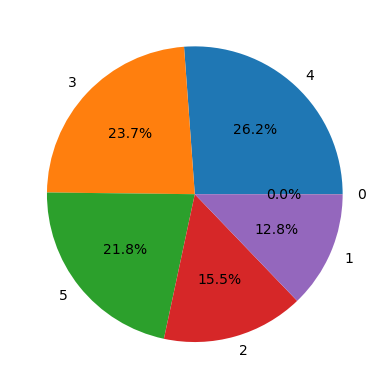

In [25]:
cleaness = train['Cleanliness'].value_counts()
plt.pie(cleaness, labels=cleaness.index, autopct='%0.1f%%')
plt.show()

4    27100
3    24506
5    22619
2    16081
1    13276
0       12
Name: Cleanliness, dtype: int64


<Axes: >

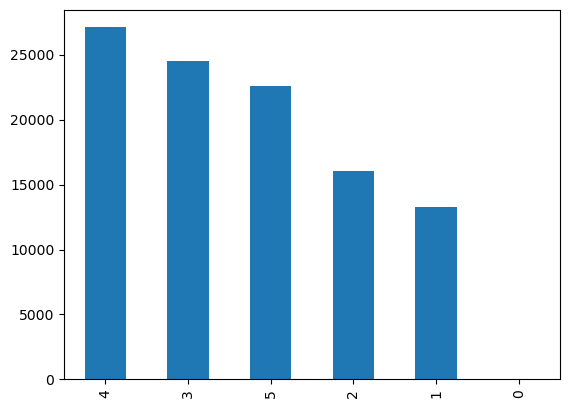

In [26]:
print(cleaness)
cleaness.plot(kind='bar')

In [27]:
train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

Female    52576
Male      51018
Name: Gender, dtype: int64

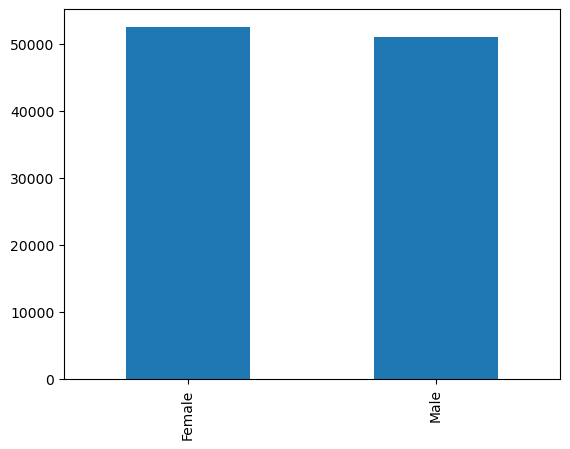

In [28]:
train.Gender.value_counts().plot(kind='bar')
train.Gender.value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

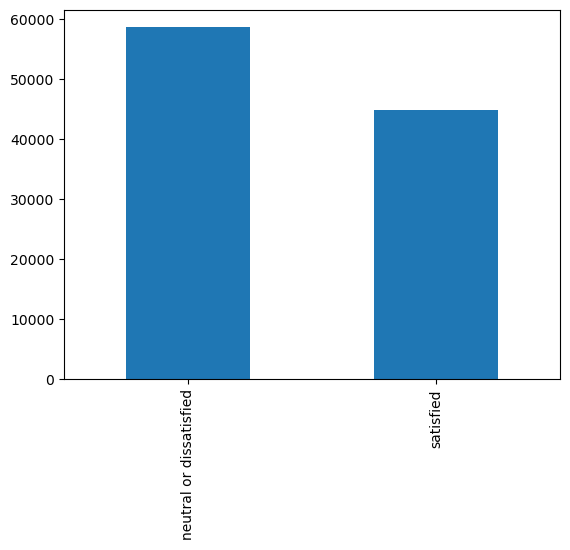

In [29]:
train.satisfaction.value_counts().plot(kind='bar')
train.satisfaction.value_counts()

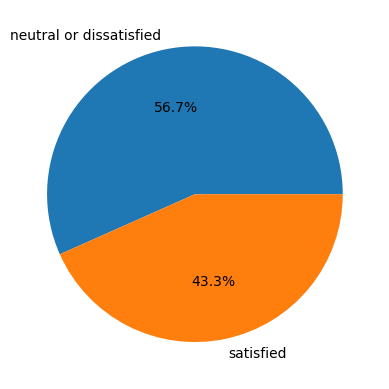

In [30]:
satisfied_or_not = train.satisfaction.value_counts()
plt.pie(satisfied_or_not, labels= satisfied_or_not.index, autopct='%.1f%%')
plt.show()

In [31]:
numerical_columns = train.select_dtypes(include=['int', 'float']).corr()
numerical_columns

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.022929,0.095184,-0.021338,-0.001714,0.014119,-0.000427,0.001254,0.055394,0.053091,0.002592,0.055255,0.044459,0.075134,0.079346,0.079468,0.025313,-0.019321,-0.037254
Age,0.022929,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147
Flight Distance,0.095184,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426
Inflight wifi service,-0.021338,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095
Departure/Arrival time convenient,-0.001714,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864
Ease of Online booking,0.014119,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984
Gate location,-0.000427,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143
Food and drink,0.001254,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,-0.029983,-0.032524
Online boarding,0.055394,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.018515,-0.021949
Seat comfort,0.053091,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,-0.027323,-0.029900


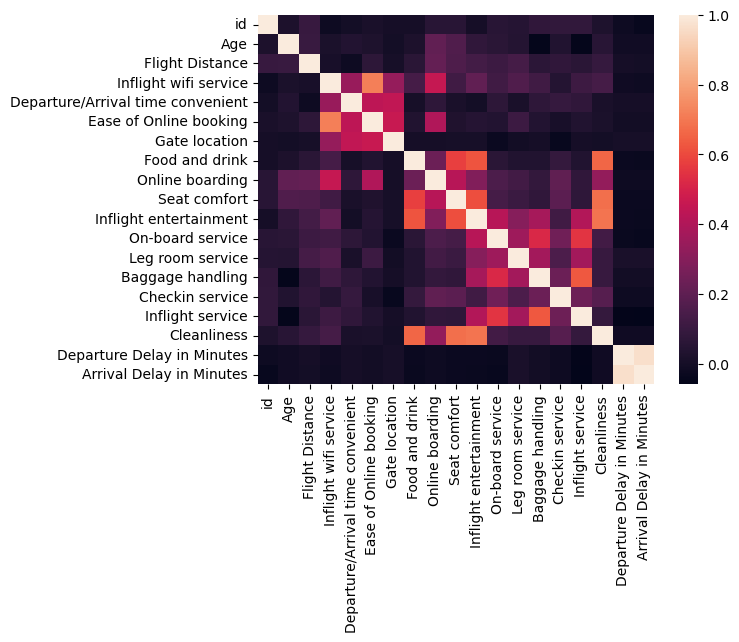

<Figure size 400x500 with 0 Axes>

In [32]:
sns.heatmap(numerical_columns)
plt.figure(figsize=(4,5))
plt.show()

In [33]:
dummies = pd.get_dummies(train)
dummies

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,70172,13,460,3,4,3,1,5,3,5,...,1,1,0,0,1,0,0,1,1,0
1,5047,25,235,3,2,3,3,1,3,1,...,1,0,1,1,0,1,0,0,1,0
2,110028,26,1142,2,2,2,2,5,5,5,...,0,1,0,1,0,1,0,0,0,1
3,24026,25,562,2,5,5,5,2,2,2,...,0,1,0,1,0,1,0,0,1,0
4,119299,61,214,3,3,3,3,4,5,5,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,...,0,0,1,1,0,0,1,0,1,0
103900,73097,49,2347,4,4,4,4,2,4,5,...,1,1,0,1,0,1,0,0,0,1
103901,68825,30,1995,1,1,1,3,4,1,5,...,1,0,1,1,0,1,0,0,1,0
103902,54173,22,1000,1,1,1,5,1,1,1,...,0,0,1,1,0,0,1,0,1,0


In [34]:
corr = dummies.corr()

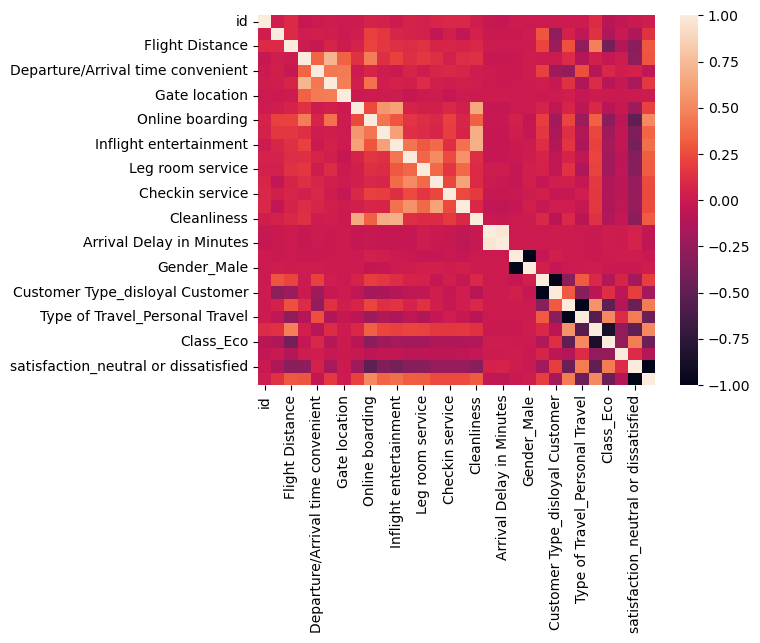

<Figure size 800x800 with 0 Axes>

In [35]:
sns.heatmap(corr)
plt.figure(figsize=(8,8))
plt.show()

In [36]:
corr

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
id,1.000000,0.022929,0.095184,-0.021338,-0.001714,0.014119,-0.000427,0.001254,0.055394,0.053091,...,-0.000301,-0.000031,0.000031,-0.000576,0.000576,0.104681,-0.080026,-0.048253,-0.013680,0.013680
Age,0.022929,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,...,0.008921,0.281821,-0.281821,0.048593,-0.048593,0.139017,-0.132656,-0.013339,-0.137040,0.137040
Flight Distance,0.095184,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,...,0.006079,0.225363,-0.225363,0.267642,-0.267642,0.467188,-0.404763,-0.123778,-0.298915,0.298915
Inflight wifi service,-0.021338,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,...,0.008964,0.007706,-0.007706,0.104879,-0.104879,0.032776,-0.037065,0.007988,-0.284163,0.284163
Departure/Arrival time convenient,-0.001714,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,...,0.008846,0.207007,-0.207007,-0.259829,0.259829,-0.096811,0.082372,0.028540,0.051718,-0.051718
Ease of Online booking,0.014119,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,...,0.007166,0.019627,-0.019627,0.133399,-0.133399,0.107490,-0.098166,-0.018787,-0.171507,0.171507
Gate location,-0.000427,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,...,0.000213,-0.006294,0.006294,0.030802,-0.030802,0.004507,-0.003395,-0.002174,-0.000449,0.000449
Food and drink,0.001254,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,...,0.005707,0.059554,-0.059554,0.063124,-0.063124,0.086915,-0.078669,-0.016550,-0.209659,0.209659
Online boarding,0.055394,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,...,-0.042151,0.189477,-0.189477,0.224620,-0.224620,0.330493,-0.293165,-0.074421,-0.503447,0.503447
Seat comfort,0.053091,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,...,-0.026643,0.159722,-0.159722,0.123994,-0.123994,0.232986,-0.205903,-0.053942,-0.349112,0.349112


In [37]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [38]:
dummies.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,70172,13,460,3,4,3,1,5,3,5,...,1,1,0,0,1,0,0,1,1,0
1,5047,25,235,3,2,3,3,1,3,1,...,1,0,1,1,0,1,0,0,1,0
2,110028,26,1142,2,2,2,2,5,5,5,...,0,1,0,1,0,1,0,0,0,1
3,24026,25,562,2,5,5,5,2,2,2,...,0,1,0,1,0,1,0,0,1,0
4,119299,61,214,3,3,3,3,4,5,5,...,1,1,0,1,0,1,0,0,0,1


In [39]:
dummies.drop('satisfaction_neutral or dissatisfied', axis=1, inplace = True)

In [40]:
dummies.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,70172,13,460,3,4,3,1,5,3,5,...,0,1,1,0,0,1,0,0,1,0
1,5047,25,235,3,2,3,3,1,3,1,...,0,1,0,1,1,0,1,0,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,1,0,1,0,1,0,1,0,0,1
3,24026,25,562,2,5,5,5,2,2,2,...,1,0,1,0,1,0,1,0,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,0,1,1,0,1,0,1,0,0,1


In [41]:
x_train = dummies.drop(['id','satisfaction_satisfied'], axis=1)
y_train = dummies.satisfaction_satisfied

In [42]:
y_train

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction_satisfied, Length: 103594, dtype: uint8

In [43]:
test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [44]:
test_dummies = pd.get_dummies(test)
test_dummies

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,19556,52,160,5,4,3,4,3,4,3,...,0,1,0,1,0,0,1,0,0,1
1,90035,36,2863,1,1,3,1,5,4,5,...,0,1,0,1,0,1,0,0,0,1
2,12360,20,192,2,0,2,4,2,2,2,...,1,0,1,1,0,0,1,0,1,0
3,77959,44,3377,0,0,0,2,3,4,4,...,1,1,0,1,0,1,0,0,0,1
4,36875,49,1182,2,3,4,3,4,1,2,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,34,526,3,3,3,1,4,3,4,...,1,0,1,1,0,1,0,0,1,0
25972,71167,23,646,4,4,4,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1
25973,37675,17,828,2,5,1,5,2,1,2,...,0,1,0,0,1,0,1,0,1,0
25974,90086,14,1127,3,3,3,3,4,4,4,...,1,1,0,1,0,1,0,0,0,1


In [45]:
test_dummies

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,19556,52,160,5,4,3,4,3,4,3,...,0,1,0,1,0,0,1,0,0,1
1,90035,36,2863,1,1,3,1,5,4,5,...,0,1,0,1,0,1,0,0,0,1
2,12360,20,192,2,0,2,4,2,2,2,...,1,0,1,1,0,0,1,0,1,0
3,77959,44,3377,0,0,0,2,3,4,4,...,1,1,0,1,0,1,0,0,0,1
4,36875,49,1182,2,3,4,3,4,1,2,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,34,526,3,3,3,1,4,3,4,...,1,0,1,1,0,1,0,0,1,0
25972,71167,23,646,4,4,4,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1
25973,37675,17,828,2,5,1,5,2,1,2,...,0,1,0,0,1,0,1,0,1,0
25974,90086,14,1127,3,3,3,3,4,4,4,...,1,1,0,1,0,1,0,0,0,1


In [46]:
test_dummies.drop('satisfaction_neutral or dissatisfied', axis=1, inplace = True)

In [47]:
test_dummies

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,19556,52,160,5,4,3,4,3,4,3,...,1,0,1,0,1,0,0,1,0,1
1,90035,36,2863,1,1,3,1,5,4,5,...,1,0,1,0,1,0,1,0,0,1
2,12360,20,192,2,0,2,4,2,2,2,...,0,1,0,1,1,0,0,1,0,0
3,77959,44,3377,0,0,0,2,3,4,4,...,0,1,1,0,1,0,1,0,0,1
4,36875,49,1182,2,3,4,3,4,1,2,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,34,526,3,3,3,1,4,3,4,...,0,1,0,1,1,0,1,0,0,0
25972,71167,23,646,4,4,4,4,4,4,4,...,0,1,1,0,1,0,1,0,0,1
25973,37675,17,828,2,5,1,5,2,1,2,...,1,0,1,0,0,1,0,1,0,0
25974,90086,14,1127,3,3,3,3,4,4,4,...,0,1,1,0,1,0,1,0,0,1


In [48]:
x_test = test_dummies.drop(['id', 'satisfaction_satisfied'], axis = 1)
y_test = test_dummies.satisfaction_satisfied

In [49]:
len(x_test)

25893

In [50]:
len(x_train)

103594

In [71]:
def train(model, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared= False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    result = pd.DataFrame({'actual': y_test, 'Predicted': y_pred})
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    print(cf_matrix)
    sns.heatmap(cf_matrix, annot=True, fmt='d')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(result)
    print(f'the mean squared error is : {mse:.2f}\n')
    print(f'the root mean squared error is : {rmse:.2f}\n')
    print(f'the mean absolute error is : {mae:.2f}\n')
    print(f'the r2 score is : {r2:.2f}\n')

# Logistic Regression

In [72]:
LR = LogisticRegression()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model score on Training data: 77.2148966156341%
Logistic Regression model score on Testing data: 77.43019348858765%
[[11531  2997]
 [ 2847  8518]]
Precision: 0.74
Recall: 0.75
F1 Score: 0.74
       actual  Predicted
0           1          0
1           1          1
2           0          0
3           1          1
4           1          0
...       ...        ...
25971       0          1
25972       1          1
25973       0          0
25974       1          1
25975       0          0

[25893 rows x 2 columns]
the mean squared error is : 0.23

the root mean squared error is : 0.48

the mean absolute error is : 28.15

the r2 score is : 0.08



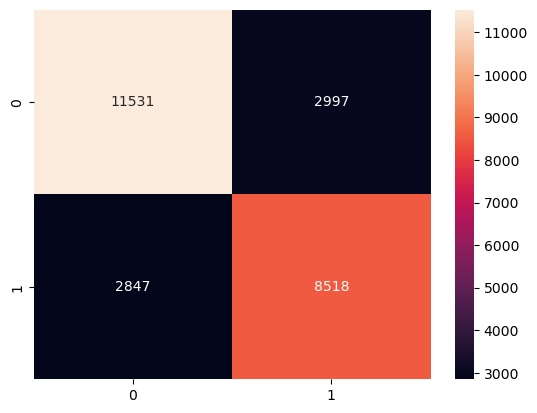

In [73]:
train(LR, 'Logistic Regression')

# Tree

In [74]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split= 8)

Decision Tree Clasifier model score on Training data: 93.10674363380119%
Decision Tree Clasifier model score on Testing data: 92.94017688178272%
[[13872   656]
 [ 1172 10193]]
Precision: 0.94
Recall: 0.90
F1 Score: 0.92
       actual  Predicted
0           1          1
1           1          1
2           0          0
3           1          0
4           1          0
...       ...        ...
25971       0          0
25972       1          1
25973       0          0
25974       1          1
25975       0          0

[25893 rows x 2 columns]
the mean squared error is : 0.07

the root mean squared error is : 0.27

the mean absolute error is : 11.57

the r2 score is : 0.71



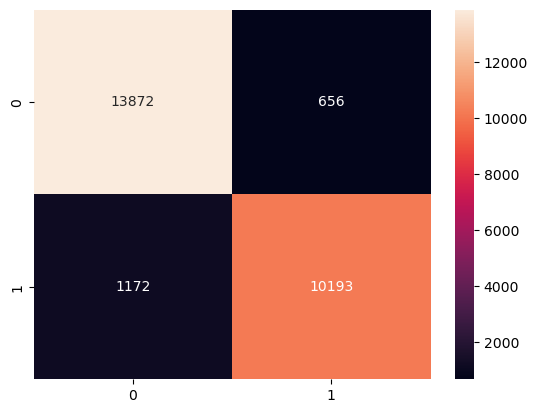

In [75]:
train(clf, 'Decision Tree Clasifier')